In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
file = r'Data Scientist Python/New_York_City_Leading_Causes_of_Death.csv'
df = pd.read_csv(file)

Let's first study the features, data types & understand if there is any missing data

In [3]:
print(list(df.columns))
print(df.shape)


['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate']
(1094, 7)


In [4]:
df.dtypes

Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

In [5]:
df.head(20)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,.,.
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,.,.,.
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4
5,2007,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,Not Stated/Unknown,5,.,.
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6
7,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1
8,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Asian and Pacific Islander,437,72.8,81.8
9,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Other Race/ Ethnicity,12,.,.


Our goal is to gain insights into how people are dying in NYC as a function of race, sex and age. First, let's get some big picture insights. Let's study:

1. The number of deaths every year up to date
2. The male to female ratio of deaths every year up to date 

In order for us to do some of these calcuations, we'll need to convert Deaths, Death Rate, Age-Adjusted Death Rate to integers. We're going to have to deal with the '.' stuff as well. Let's convert these to 0 for now. 

In [6]:
df_zero = df.apply(lambda x: x.replace('.','0'))[['Deaths','Death Rate','Age Adjusted Death Rate']].astype('float')
df_zero[['Ethnicity','Year','Cause','Sex']] = df[['Race Ethnicity','Year','Leading Cause','Sex']]

Text(0,0.5,'Number of Deaths')

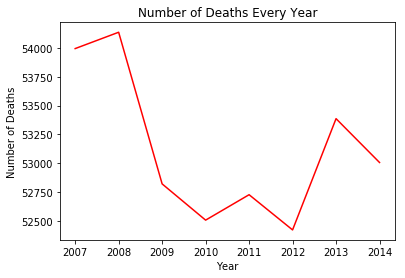

In [7]:
# 1. Let's study the number of deaths per year 
# We're going to group by the year, aggreggate the deaths and then sort by year
deaths_by_year = df_zero.groupby('Year')['Deaths'].agg('sum').plot(color='r')
plt.title('Number of Deaths Every Year')
plt.ylabel('Number of Deaths')

We see that the number of deaths has increased a little recently. There was a huge increase from 2012-2013, but 2014 is getting better.

In [8]:
# Let's study the female and male deaths every year
deaths_by_sex_year = df_zero.groupby(['Year','Sex'])['Deaths'].agg('sum').reset_index()
deaths_by_male = deaths_by_sex_year[deaths_by_sex_year['Sex']=='M']
deaths_by_female = deaths_by_sex_year[deaths_by_sex_year['Sex']=='F']


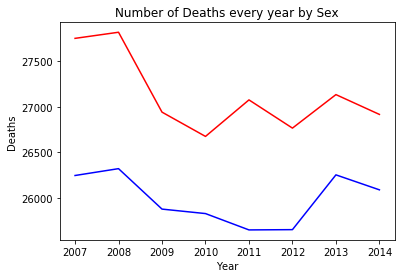

In [9]:
# Better to do a scatter plot and hue will be male vs. female 
plt.plot(deaths_by_male.Year, deaths_by_male.Deaths,label='Male',color='b')
plt.plot(deaths_by_male.Year, deaths_by_female.Deaths,label='Male',color='r')
plt.title('Number of Deaths every year by Sex')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.show()

Wow, looks like females are getting killed more than males every year since 2007. 

Now, let's study the ethnicities and start by identifying all the ethnicities present. 

In [10]:
pd.Series(df_zero['Ethnicity'].unique())

0            Black Non-Hispanic
1            Not Stated/Unknown
2         Other Race/ Ethnicity
3                      Hispanic
4    Asian and Pacific Islander
5            White Non-Hispanic
dtype: object

Now, I'd like to study how the number of deaths have changed every year per ethnicity. We will group by year and ethnicity and sum on the deaths. Let's do a bar-plot of deaths per ethnicity every year. 

In [11]:
# Black Non-Hispanic
df_black_hispanic = df_zero.groupby(['Year','Ethnicity'])['Deaths'].agg('sum').reset_index()

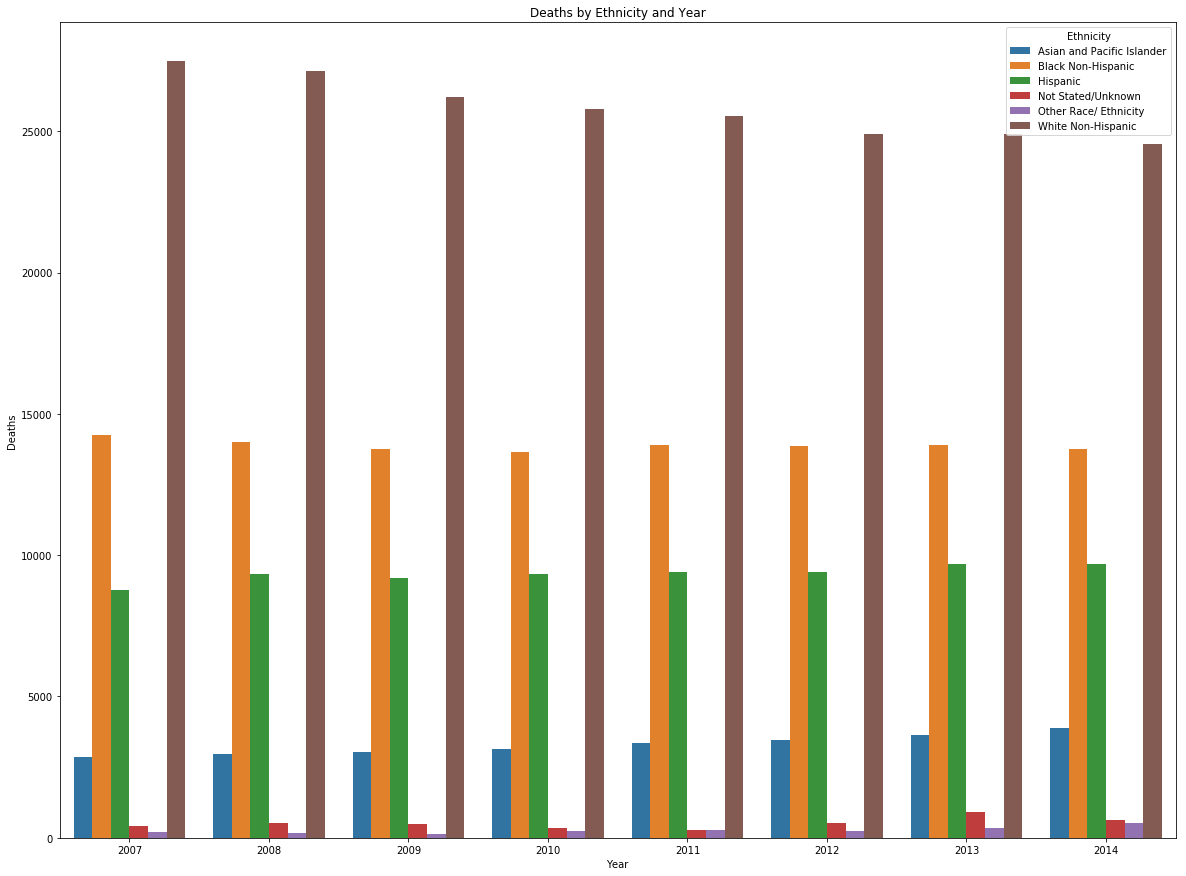

In [12]:
plt.figure(figsize=(20,15))
sns.barplot(x='Year',y='Deaths',hue='Ethnicity',data=df_black_hispanic)
plt.title('Deaths by Ethnicity and Year')
plt.show()

It looks like every year, the number of deaths per ethnic group was roughly similar. The number of deaths by ethnic group ranks by:

1. White Non-Hispanic
2. Black Non-Hispanic
3. Hispanic
4. Asian and Pacific Islander
5. Other Race/Ethnicity

Next, it would be cool to study why there is such a high number of deaths for white non-hispanic and such a low number of deaths for other race/ethnicity. We should look into the leading cause of death every year for white non-hispanics. 

Ways to do this:

1. Group by year and ethnicity and find cause of highest number of deaths for white non-hispanics

In [44]:
df_white_leading_deaths = df_zero.groupby(['Year','Ethnicity'])

def get_WH(gr):     
    temp = gr['Ethnicity'] == 'White Non-Hispanic'
    white_hispanic = gr.loc[temp,['Deaths','Cause']]
    return white_hispanic

White_hispanics = df_white_leading_deaths.apply(get_WH).reset_index()

In [46]:
max_deaths = White_hispanics.groupby('Year')['Deaths'].agg('max')

In [79]:
White_hispanics[White_hispanics['Deaths'].isin(list(max_deaths))]

,Year,Ethnicity,level_2,Deaths,Cause
9,2007,White Non-Hispanic,453,7050.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
26,2008,White Non-Hispanic,201,6836.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
45,2009,White Non-Hispanic,70,6297.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
71,2010,White Non-Hispanic,230,5351.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
92,2011,White Non-Hispanic,135,5016.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
111,2012,White Non-Hispanic,39,4719.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
146,2013,White Non-Hispanic,542,4535.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"
157,2014,White Non-Hispanic,168,4507.0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)"


It looks like the highest leading cause of death in white non-hispanics is due to heart disease every year ! Interesting...